In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.special
import pandas as pd

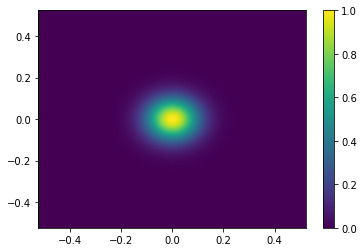

In [3]:
xlim = 30*np.pi/180
#xlim = 1
x = np.linspace(-xlim, xlim, 1201)
y=x
lambda_wl = 3e8/425e6 
D = 6
sigma = 1.22*lambda_wl/D

xx, yy = np.meshgrid(x, y)

#zz = np.exp(-(xx**2 + yy**2))
gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*(xx**2+yy**2))/(sigma**2))
#gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
#plt.plot(x,gauss)
plt.pcolormesh(xx,yy,gauss)
plt.colorbar()
plt.show()

<ipython-input-2-4d52b55ebb5e>:10: RuntimeWarning: invalid value encountered in true_divide
  sinc_func= np.sin(14*np.pi*x)/(14*np.pi*x)


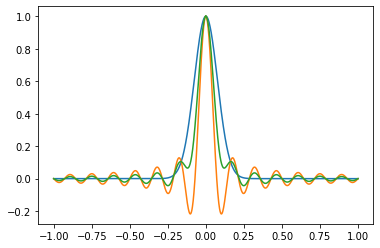

In [2]:
x = np.linspace(-1, 1, 1201)
lambda_wl = 3e8/400e6 
D = 6
sigma = 1.22*lambda_wl/D

gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
plt.plot(x,gauss, label='400 MHz')

sinc_func= np.sin(14*np.pi*x)/(14*np.pi*x)
plt.plot(x,sinc_func, label='sinc')

sum_func = gauss+sinc_func
plt.plot(x, sum_func/max(sum_func))
plt.show()

<ipython-input-5-dd7a92d3c956>:10: RuntimeWarning: invalid value encountered in true_divide
  sinc_func= np.sin(14*np.pi*x)/(14*np.pi*x)
<ipython-input-5-dd7a92d3c956>:19: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


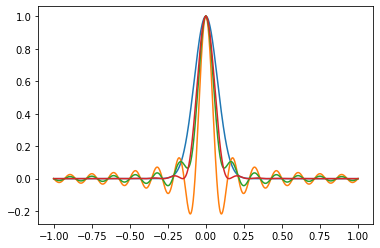

In [5]:
x = np.linspace(-1, 1, 1201)
lambda_wl = 3e8/400e6 
D = 6
sigma = 1.22*lambda_wl/D

gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
plt.plot(x,gauss, label='400 MHz')

sinc_func= np.sin(14*np.pi*x)/(14*np.pi*x)
plt.plot(x,sinc_func, label='sinc')

sum_func = gauss+sinc_func
plt.plot(x, sum_func/max(sum_func))
#plt.show()

R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2

plt.plot(x,airy_1D)
plt.show()

In [7]:

#calculate dB
def efield(W):
    return 10*np.log10(377*W)

<ipython-input-17-47ec72a94d94>:14: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


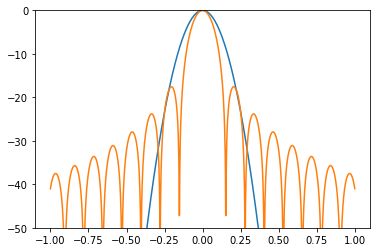

In [17]:
x = np.linspace(-1, 1, 1201)
lambda_wl = 3e8/400e6 
D = 6
sigma = 1.22*lambda_wl/D

gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
plt.plot(x,gauss_dB-max(gauss_dB), label='400 MHz')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)
plt.plot(x, airy_1D_dB-max(airy_1D_dB))

plt.ylim(-50, 0)
plt.show()

<ipython-input-32-722fc614dc32>:14: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


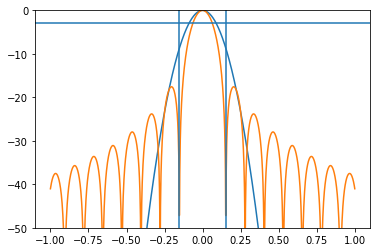

In [32]:
x = np.linspace(-1, 1, 1201)
lambda_wl = 3e8/400e6 
D = 6
sigma = 1.22*lambda_wl/D

gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
plt.plot(x,gauss_dB-max(gauss_dB), label='400 MHz')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)
plt.plot(x, airy_1D_dB-max(airy_1D_dB))

plt.axvline(sigma)
plt.axvline(-sigma)
plt.axhline(-3)

plt.ylim(-50, 0)
plt.show()

<ipython-input-36-073254a4ef19>:15: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


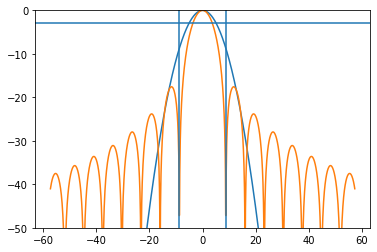

In [36]:
x = np.linspace(-1, 1, 1201)
lambda_wl = 3e8/400e6 
D = 6
sigma = 1.22*lambda_wl/D
ang_thet = np.rad2deg(x)

gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
plt.plot(ang_thet,gauss_dB-max(gauss_dB), label='400 MHz')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)

plt.plot(ang_thet, airy_1D_dB-max(airy_1D_dB))

plt.axvline(np.rad2deg(sigma))
plt.axvline(-np.rad2deg(sigma))
plt.axhline(-3)

plt.ylim(-50, 0)
plt.show()

In [33]:
np.rad2deg(sigma)

8.737606375745054

In [13]:
print(max(efield(airy_1D)))
print(max(efield(gauss)))

25.76150943451215
25.76341350205793


In [56]:
link = '/mnt/d/users/kgerodias/CHORD Simulations'
ref = 'chord_sf_gum_v0'
#freq = np.array([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8])
#freq = np.array([0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
#                0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5])

#freq = np.array([0.3, 0.7, 1.0, 1.1, 1.5])
#determining np.loadtxt skiprows value
#phi = 0 deg: 129603
#phi = 45 deg: 194403
#phi = 90 deg: 259203
#number of indices per deg: 719
num_idx = 720
skip_mat = [129602, 194402, 259202]
phi_mat = [0, 45, 90]


folder = '/Export/Farfield/'

In [60]:
#needs to run before anything else?

freq = np.array([0.425, 0.7, 1.2])
#freq = np.array([0.4,  0.6, 0.8])
freq_mat = np.concatenate((freq, freq))

abs_E_ref = [] #this abs_E for 2D beam mapping
cst_theta_phi0_ref = [] #this is a theta directly from CST
cst_abs_E_phi0_ref = [] #this is abs_E directly from CST
cst_theta_phi90_ref = [] #this is a theta directly from CST
cst_abs_E_phi90_ref = [] #this is abs_E directly from CST

num_idx = 720
skip_mat = [129602, 259202]

for i in range(len(freq)):
    
    
    filename = link+'/'+ref+folder+'farfield (f='+str(freq[i])+') [1]_efield.txt'
    df = pd.read_table(filename, skiprows=[0, 1,], sep='\s+', 
                       names=['theta', 'phi', 'AbsE', 'AbsCr', 'PhCr', 'AbsCo', 'PhCo', 'AxRat'])
    ntheta = df.theta.abs()
    nphi = df.phi.copy()
    nphi[df.theta < 0] += 180
    ntheta[df.theta == -180] = 0.
    nphi[nphi < 0] += 360

    ndf = df.copy()
    ndf['ntheta'] = ntheta
    ndf['nphi'] = nphi
    ndf = ndf.query('phi != -90') # Redundant (almost)
    ndf = ndf.sort_values(by=['ntheta', 'nphi'], ignore_index=True)
    ndf = ndf.query('ntheta < 90') # Set max theta here
    # Fix front beam
    ndf.loc[ndf.ntheta == 0] = ndf.query('theta == 0 and phi == 0').values
    ndf.loc[ndf.ntheta == 0, 'nphi'] = ndf.loc[ndf.ntheta == 1]['nphi'].values
    #ndf_query_arr_val = ndf.query('theta == 0 and phi == 0').values[0][2:-2]
    #for j in range(len(ndf_query_arr_val)):
    #    ndf.loc[ndf.ntheta == 0, ndf.columns[j+2]] = ndf_query_arr_val[j]
    #ndf.loc[ndf.ntheta == 0, 'nphi'] = ndf.loc[ndf.ntheta == 1]['nphi'].values

    Nth = len(ndf.ntheta.unique())
    abs_E_ref.append(ndf.AbsE.values.reshape((Nth, -1)))
    theta = ndf.ntheta.values.reshape((Nth, -1))
    phi = ndf.nphi.values.reshape((Nth, -1))
    

    try:
        cst_theta_phi0_ref.append(np.loadtxt(filename, skiprows=skip_mat[0], max_rows=num_idx, usecols=0))
        cst_abs_E_phi0_ref.append(np.loadtxt(filename, skiprows=skip_mat[0], max_rows=num_idx, usecols=2))

    except:
        pass

    try:
        cst_theta_phi90_ref.append(np.loadtxt(filename, skiprows=skip_mat[1], max_rows=num_idx, usecols=0))
        cst_abs_E_phi90_ref.append(np.loadtxt(filename, skiprows=skip_mat[1], max_rows=num_idx, usecols=2))

    except:
        pass
        
    

In [25]:
cst_abs_E_phi0_ref

[array([ -6.916  ,  -7.034  ,  -7.374  ,  -7.881  ,  -8.431  ,  -8.811  ,
         -8.779  ,  -8.24   ,  -7.341  ,  -6.326  ,  -5.378  ,  -4.595  ,
         -4.023  ,  -3.679  ,  -3.573  ,  -3.716  ,  -4.124  ,  -4.823  ,
         -5.864  ,  -7.326  ,  -9.352  , -12.24   , -16.77   , -26.1    ,
        -25.27   , -17.26   , -13.54   , -11.37   , -10.05   ,  -9.309  ,
         -9.019  ,  -9.106  ,  -9.525  , -10.23   , -11.12   , -12.03   ,
        -12.61   , -12.53   , -11.8    , -10.73   ,  -9.661  ,  -8.744  ,
         -8.041  ,  -7.575  ,  -7.34   ,  -7.332  ,  -7.548  ,  -7.989  ,
         -8.66   ,  -9.569  , -10.73   , -12.14   , -13.8    , -15.6    ,
        -17.3    , -18.39   , -18.51   , -17.92   , -17.12   , -16.4    ,
        -15.82   , -15.39   , -15.02   , -14.62   , -14.1    , -13.42   ,
        -12.61   , -11.71   , -10.79   ,  -9.909  ,  -9.087  ,  -8.356  ,
         -7.717  ,  -7.171  ,  -6.711  ,  -6.33   ,  -6.018  ,  -5.763  ,
         -5.554  ,  -5.382  ,  -5.23  

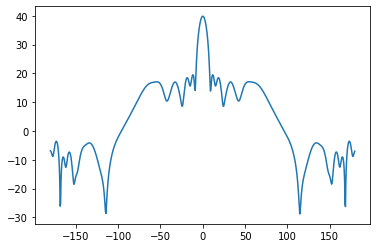

In [28]:
plt.plot(cst_theta_phi0_ref[0], cst_abs_E_phi0_ref[0])

<ipython-input-47-8b65bbc96276>:17: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


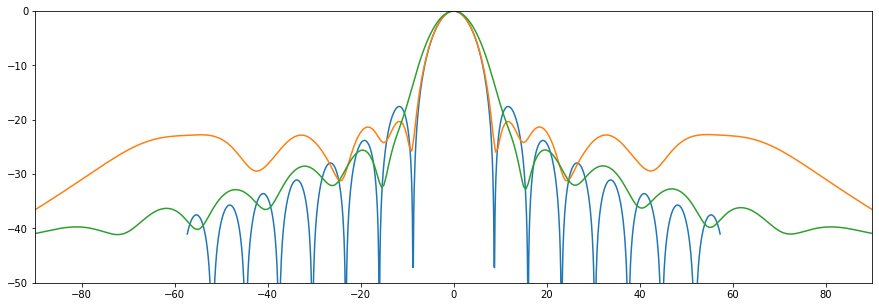

In [47]:
x = np.linspace(-1, 1, 1201)
lambda_wl = 3e8/400e6 
D = 6
sigma = 1.22*lambda_wl/D
ang_thet = np.rad2deg(x)


plt.figure(figsize=(15,5))
gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
#plt.plot(ang_thet,gauss_dB-max(gauss_dB), label='400 MHz')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)

plt.plot(ang_thet, airy_1D_dB-max(airy_1D_dB))


plt.plot(cst_theta_phi0_ref[0], cst_abs_E_phi0_ref[0]-max(cst_abs_E_phi0_ref[0]))
plt.plot(cst_theta_phi90_ref[0], cst_abs_E_phi90_ref[0]-max(cst_abs_E_phi90_ref[0]))

#plt.axvline(np.rad2deg(sigma))
#plt.axvline(-np.rad2deg(sigma))
#plt.axhline(-3)

plt.ylim(-50, 0)
plt.xlim(-90,90)
plt.show()

<ipython-input-55-f6ef6d9bc900>:18: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


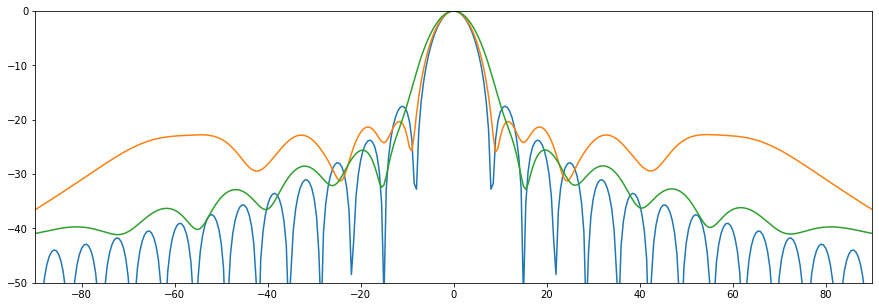

In [55]:

ang_thet = np.linspace(-90, 90, 361)
x = np.deg2rad(ang_thet)
lambda_wl = 3e8/425e6 
D = 6
sigma = 1.22*lambda_wl/D
#ang_thet = np.rad2deg(x)


plt.figure(figsize=(15,5))
gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
#plt.plot(ang_thet,gauss_dB-max(gauss_dB), label='400 MHz')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)

plt.plot(ang_thet, airy_1D_dB-max(airy_1D_dB))


plt.plot(cst_theta_phi0_ref[0], cst_abs_E_phi0_ref[0]-max(cst_abs_E_phi0_ref[0]))
plt.plot(cst_theta_phi90_ref[0], cst_abs_E_phi90_ref[0]-max(cst_abs_E_phi90_ref[0]))

#plt.axvline(np.rad2deg(sigma))
#plt.axvline(-np.rad2deg(sigma))
#plt.axhline(-3)

plt.ylim(-50, 0)
plt.xlim(-90,90)
plt.show()

<ipython-input-84-fd6691464f94>:22: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


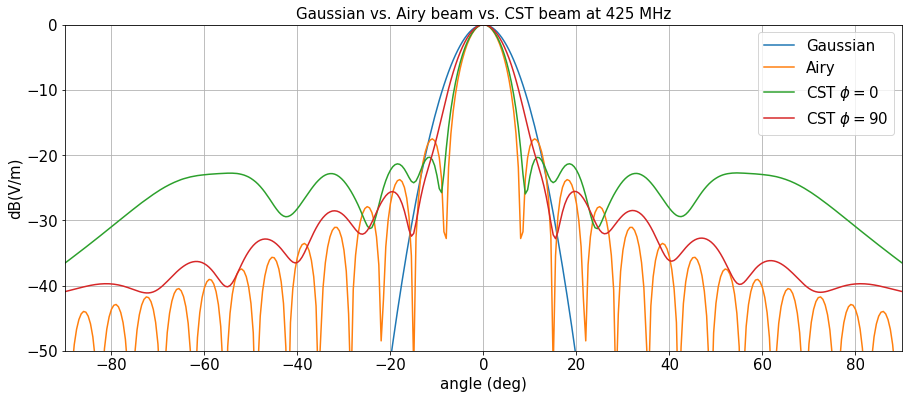

In [84]:
fontsize_A = 15
fontsize_B = 15

idx=0
ang_thet = np.linspace(-90, 90, 361)
x = np.deg2rad(ang_thet)
lambda_wl = 3e8/(freq[idx]*1000e6)
D = 6
sigma = 1.22*lambda_wl/D
#ang_thet = np.rad2deg(x)


plt.figure(figsize=(15,6))
gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
plt.plot(ang_thet,gauss_dB-max(gauss_dB), label='Gaussian')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)

plt.plot(ang_thet, airy_1D_dB-max(airy_1D_dB), label = 'Airy')


plt.plot(cst_theta_phi0_ref[idx], cst_abs_E_phi0_ref[idx]-max(cst_abs_E_phi0_ref[idx]), label = 'CST $\phi = 0$')
plt.plot(cst_theta_phi90_ref[idx], cst_abs_E_phi90_ref[idx]-max(cst_abs_E_phi90_ref[idx]), label = 'CST $\phi = 90$')

#plt.axvline(np.rad2deg(sigma))
#plt.axvline(-np.rad2deg(sigma))
#plt.axhline(-3)

plt.legend(fontsize = fontsize_B, loc=1)
plt.xticks(fontsize = fontsize_B)
plt.yticks(fontsize = fontsize_B)
plt.xlabel('boresight (deg)', fontsize = fontsize_A)
plt.ylabel('dB(V/m)', fontsize = fontsize_A)
plt.title('Gaussian vs. Airy beam vs. CST beam at %.0f MHz' % (freq[idx]*1000), fontsize = fontsize_A)
plt.ylim(-50, 0)
plt.xlim(-90,90)
plt.grid()
plt.show()

<ipython-input-85-89cd6505edf2>:22: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


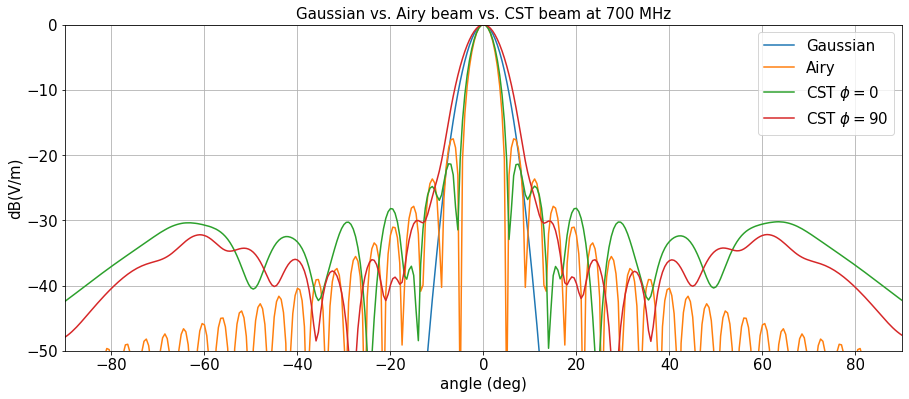

In [85]:
fontsize_A = 15
fontsize_B = 15

idx=1
ang_thet = np.linspace(-90, 90, 361)
x = np.deg2rad(ang_thet)
lambda_wl = 3e8/(freq[idx]*1000e6)
D = 6
sigma = 1.22*lambda_wl/D
#ang_thet = np.rad2deg(x)


plt.figure(figsize=(15,6))
gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
plt.plot(ang_thet,gauss_dB-max(gauss_dB), label='Gaussian')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)

plt.plot(ang_thet, airy_1D_dB-max(airy_1D_dB), label = 'Airy')


plt.plot(cst_theta_phi0_ref[idx], cst_abs_E_phi0_ref[idx]-max(cst_abs_E_phi0_ref[idx]), label = 'CST $\phi = 0$')
plt.plot(cst_theta_phi90_ref[idx], cst_abs_E_phi90_ref[idx]-max(cst_abs_E_phi90_ref[idx]), label = 'CST $\phi = 90$')

#plt.axvline(np.rad2deg(sigma))
#plt.axvline(-np.rad2deg(sigma))
#plt.axhline(-3)

plt.legend(fontsize = fontsize_B, loc=1)
plt.xticks(fontsize = fontsize_B)
plt.yticks(fontsize = fontsize_B)
plt.xlabel('boresight (deg)', fontsize = fontsize_A)
plt.ylabel('dB(V/m)', fontsize = fontsize_A)
plt.title('Gaussian vs. Airy beam vs. CST beam at %.0f MHz' % (freq[idx]*1000), fontsize = fontsize_A)
plt.ylim(-50, 0)
plt.xlim(-90,90)
plt.grid()
plt.show()

<ipython-input-7-0ddd257014a8>:3: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(377*W)
<ipython-input-87-fd35082ccd4a>:22: RuntimeWarning: invalid value encountered in true_divide
  airy_1D = (2 * scipy.special.j1(xx) / xx)**2


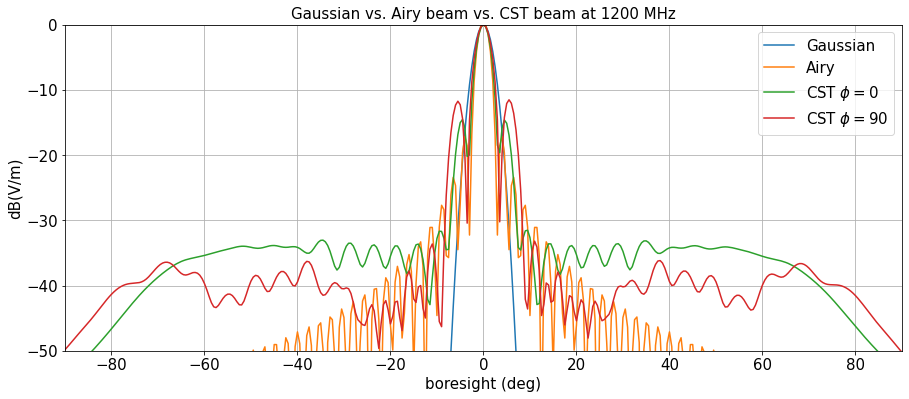

In [87]:
fontsize_A = 15
fontsize_B = 15

idx=2
ang_thet = np.linspace(-90, 90, 361)
x = np.deg2rad(ang_thet)
lambda_wl = 3e8/(freq[idx]*1000e6)
D = 6
sigma = 1.22*lambda_wl/D
#ang_thet = np.rad2deg(x)


plt.figure(figsize=(15,6))
gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(2*x**2)/(sigma**2))
gauss = gauss/np.max(gauss)
gauss_dB = efield(gauss)
plt.plot(ang_thet,gauss_dB-max(gauss_dB), label='Gaussian')


R_z = scipy.special.jn_zeros(1,3)[0]/np.pi
xx = np.pi*x/(sigma/R_z)
airy_1D = (2 * scipy.special.j1(xx) / xx)**2
airy_1D_dB = efield(airy_1D)

plt.plot(ang_thet, airy_1D_dB-max(airy_1D_dB), label = 'Airy')


plt.plot(cst_theta_phi0_ref[idx], cst_abs_E_phi0_ref[idx]-max(cst_abs_E_phi0_ref[idx]), label = 'CST $\phi = 0$')
plt.plot(cst_theta_phi90_ref[idx], cst_abs_E_phi90_ref[idx]-max(cst_abs_E_phi90_ref[idx]), label = 'CST $\phi = 90$')

#plt.axvline(np.rad2deg(sigma))
#plt.axvline(-np.rad2deg(sigma))
#plt.axhline(-3)

plt.legend(fontsize = fontsize_B, loc=1)
plt.xticks(fontsize = fontsize_B)
plt.yticks(fontsize = fontsize_B)
plt.xlabel('boresight (deg)', fontsize = fontsize_A)
plt.ylabel('dB(V/m)', fontsize = fontsize_A)
plt.title('Gaussian vs. Airy beam vs. CST beam at %.0f MHz' % (freq[idx]*1000), fontsize = fontsize_A)
plt.ylim(-50, 0)
plt.xlim(-90,90)
plt.grid()
plt.show()